In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import set_config
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
DATA_PATH = 'Dane/wine.data'
names = ['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
        'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
set_config(display='diagram')

In [3]:
data = pd.read_csv(DATA_PATH, sep=',', names=names)

| Nazwa zmiennej                  | Jednostka          | Opis                                                                 |
|---------------------------------|------------------|----------------------------------------------------------------------|
| class                           |                   | Do której klasy 1-3 przynależy
| Alcohol                         | % vol             | Zawartość alkoholu w winie.                                         |
| Malic acid                      | g/l               | Kwas jabłkowy, wpływa na smak i kwasowość.                          |
| Ash                             | g/l               | Popiół – pozostałość mineralna po spaleniu wina.                     |
| Alcalinity of ash               | mEq/l             | Zasadowość popiołu, zdolność do neutralizacji kwasów.               |
| Magnesium                       | mg/l              | Zawartość magnezu, minerał obecny w winie.                           |
| Total phenols                    | mg/l              | Całkowita zawartość fenoli, wpływa na smak, barwę i antyoksydanty.  |
| Flavanoids                       | mg/l              | Flawonoidy – rodzaj fenoli, wpływają na barwę i smak.                |
| Nonflavanoid phenols             | mg/l              | Fenole nieflawonoidowe, wpływają na smak i właściwości chemiczne.   |
| Proanthocyanins                  | mg/l              | Proantocyjanidyny, wpływają na smak i taniny.                        |
| Color intensity                  | jednostka bezwzgl. | Intensywność barwy wina (pomiar spektrofotometryczny).              |
| Hue                              | jednostka bezwzgl. | Odcień wina, stosunek barwników czerwonych do żółtych.              |
| OD280/OD315 of diluted wines     | jednostka bezwzgl. | Stosunek absorbancji przy 280 i 315 nm, ocena polifenoli i jakości. |
| Proline                          | mg/l              | Prolina – aminokwas wskazujący na dojrzałość i typ wina.            |


In [69]:
data.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [70]:
data.describe()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [72]:
data['class'].value_counts()

class
2    71
1    59
3    48
Name: count, dtype: int64

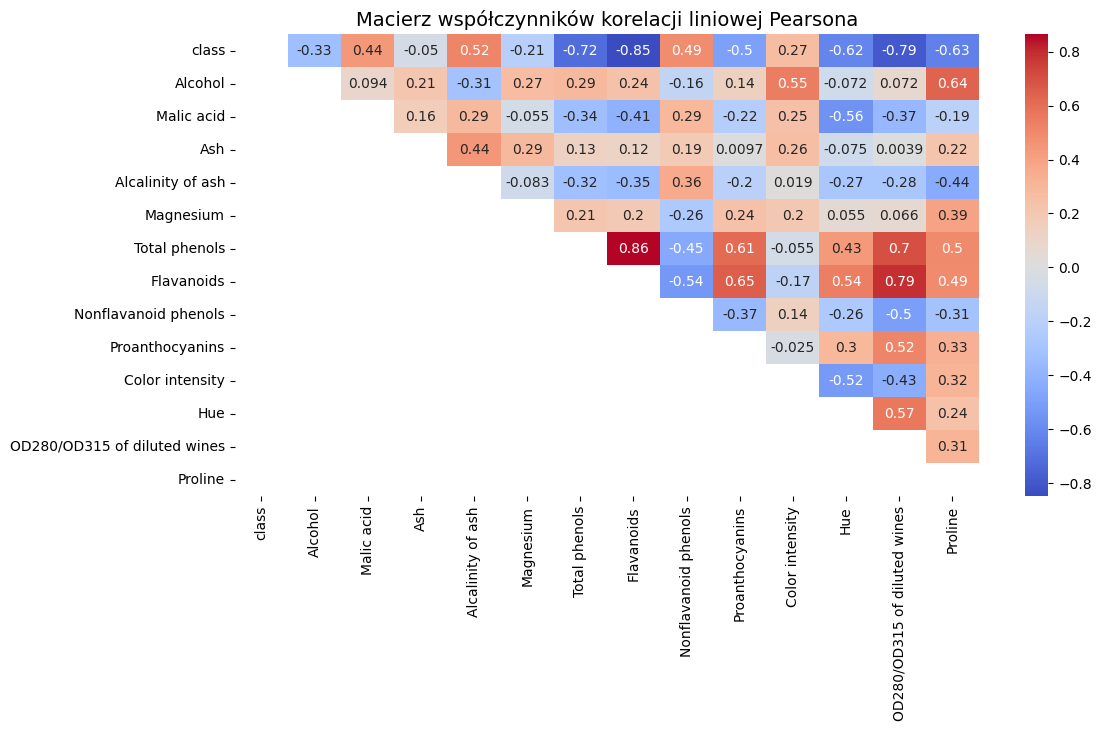

In [73]:
corr_matrix_pearson = data.corr(method='pearson')

plt.rcParams.update({
    'font.size': 10,  
    'axes.titlesize': 14,  
    'axes.labelsize': 12,   
    'xtick.labelsize': 10, 
    'ytick.labelsize': 10  
})

fig, ax = plt.subplots(figsize=(12,6), facecolor='white')

sns.heatmap(data=corr_matrix_pearson, mask=np.tril(corr_matrix_pearson), ax=ax, cmap='coolwarm', annot=True)
ax.set_title('Macierz współczynników korelacji liniowej Pearsona')

plt.show()

***DODATNIA***
- **TOTAL PHENOLS** i **FLAVANOIDS**
- **FLAVANOIDS** i **OD280/OD315 of diluted wines**

Sugeruje to, aby opuścić falvanoids przed klasyfikacją

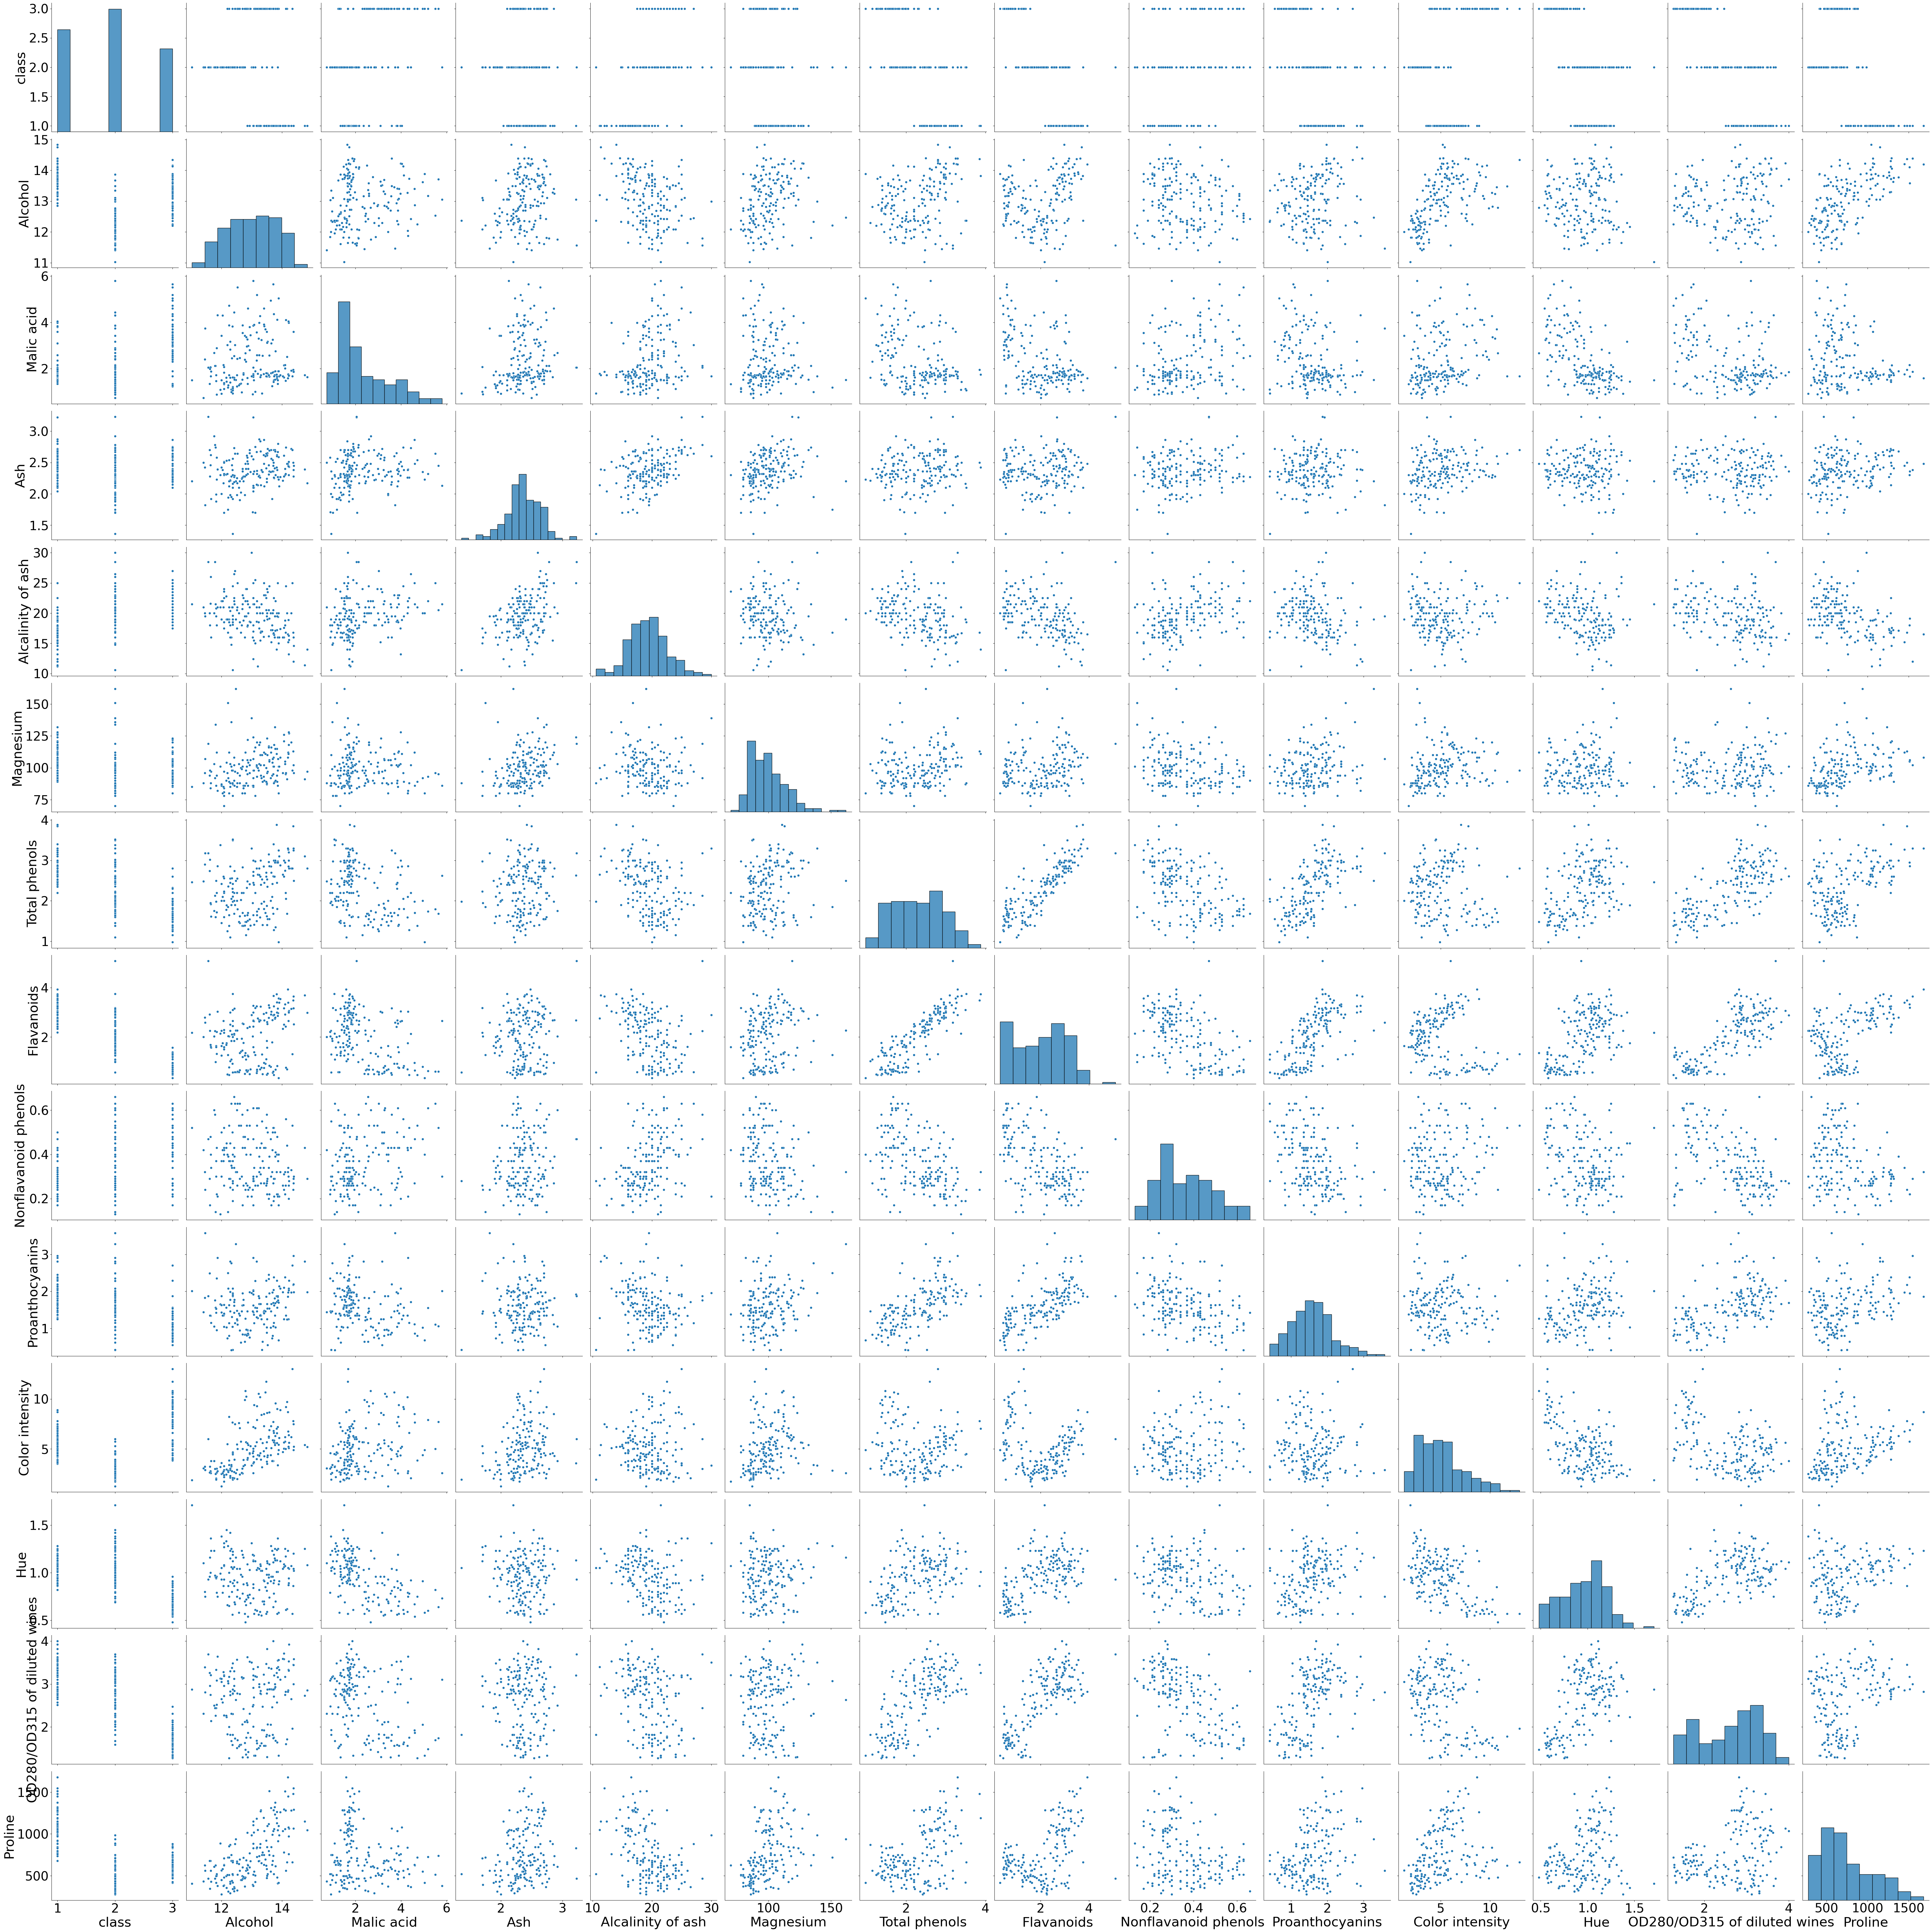

In [74]:
plt.rcParams.update({'axes.labelsize': 34,
                     'xtick.labelsize': 32,
                     'ytick.labelsize': 32,
                     'legend.fontsize': 32})

sns.pairplot(data, height=5, aspect=1)
plt.show()

***LINIOWOŚĆ WIDAĆ W***
- **TOTAL PHENOLS** i **FLAVANOIDS**

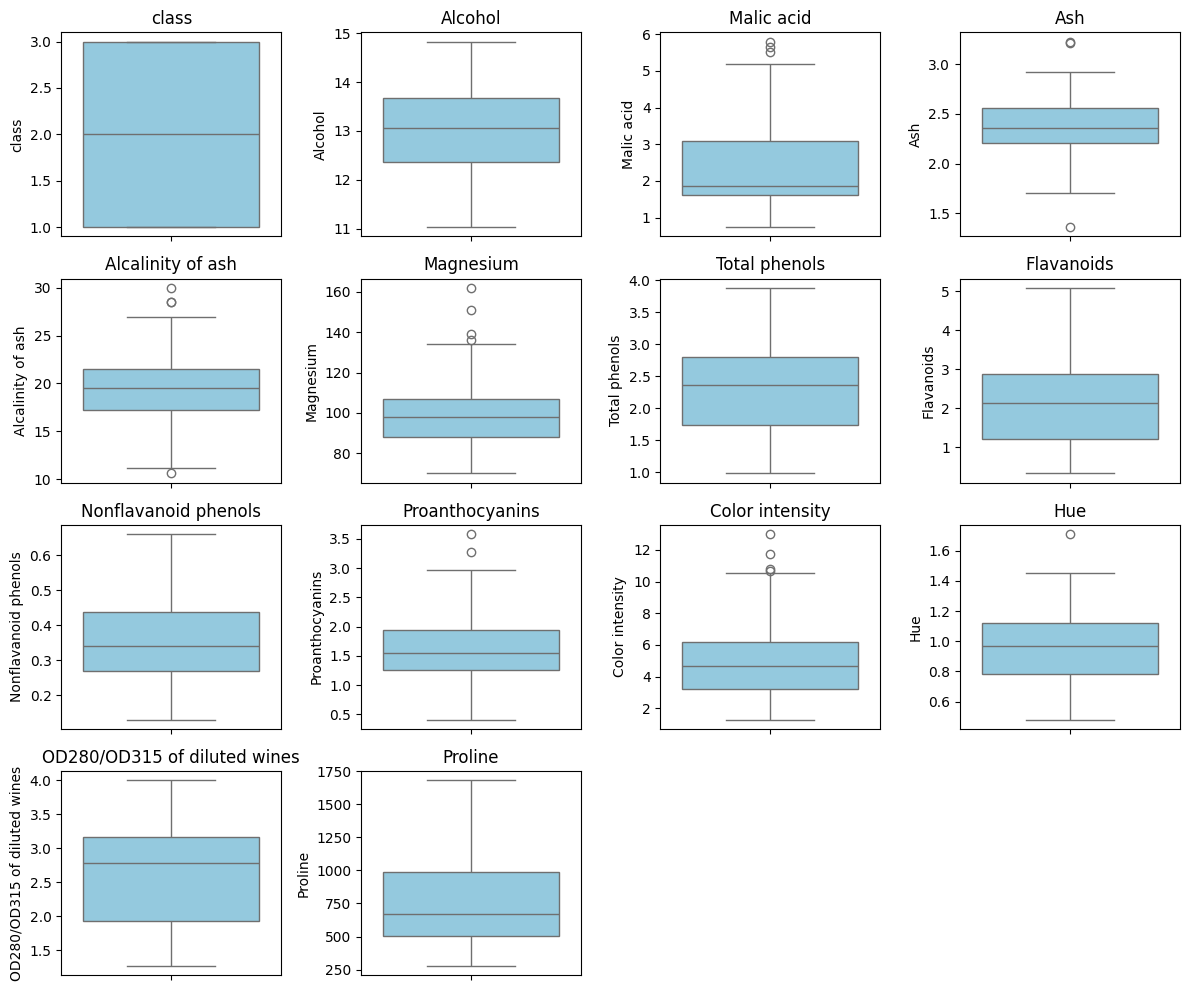

In [75]:
plt.figure(figsize=(12,10))
plt.rcdefaults() 
for i, col in enumerate(names, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.show()

In [17]:
X = data.drop(['class', 'Flavanoids'], axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
knn_model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors=3))
])

knn_model.fit(X_train, y_train)
knn_model

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


In [19]:
knn_pred = knn_model.predict(X_test)

In [20]:
metrics = {
    'Accuracy': [accuracy_score(y_test, knn_pred)]
}
pd.DataFrame(metrics, index=['KNN']).T

,KNN
Accuracy,0.944444


In [ ]:
rf_pipe = Pipeline([
    ('model', RandomForestClassifier(random_state=666))
])

param_grid = {
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': [5, 8, 10],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(
    estimator=rf_pipe,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)
grid.fit(X_train, y_train)

In [ ]:
print("Best params:", grid.best_params_)

In [ ]:
rf_pred = grid.best_estimator_.predict(X_test)

In [ ]:
metrics = {
    'Accuracy': [accuracy_score(y_test, rf_pred)]
}
pd.DataFrame(metrics, index=['RF']).T

## 1. Accuracy (dokładność)
- **Co mierzy:** odsetek poprawnie sklasyfikowanych próbek względem wszystkich próbek.
- **Wzór:** (TP + TN) / (TP + TN + FP + FN)
- **Kontekst:** dobre przy klasach zbalansowanych; **niezalecane przy dużej dysproporcji klas**.

---

## 2. Precision (precyzja)
- **Co mierzy:** odsetek prawdziwych pozytywów spośród wszystkich przewidzianych jako pozytywne.
- **Wzór:** TP / (TP + FP)
- **Kontekst:** ważna gdy **fałszywe alarmy są kosztowne** (np. diagnoza choroby).

---

## 3. Recall (czułość, sensitivity)
- **Co mierzy:** odsetek prawdziwych pozytywów spośród wszystkich rzeczywistych pozytywnych przypadków.
- **Wzór:** TP / (TP + FN)
- **Kontekst:** ważna gdy **pominięcie prawdziwego przypadku jest kosztowne** (np. wykrywanie chorób).

---

## 4. F-measure (F1 score)
- **Co mierzy:** harmoniczna średnia **precision i recall**.
- **Wzór:** 2 * (precision * recall) / (precision + recall)
- **Kontekst:** gdy chcemy **zbalansować precision i recall**.
- **Uwagi:** istnieje też F-beta, który pozwala bardziej faworyzować precision lub recall.

---

## 5. Confusion matrix (macierz pomyłek)
- **Co pokazuje:** tabelę z liczbami przewidzianych i rzeczywistych klas.  
\begin{bmatrix}
TP & FP\\
FN & TN
\end{bmatrix}
- **Kontekst:**  
  - Pozwala zobaczyć dokładnie **jak model myli klasy**.  
  - Przydatne do obliczania innych metryk (precision, recall, F1).

---

## 6. Classification report (raport klasyfikacji)
- **Co robi:** generuje **podsumowanie najważniejszych metryk dla każdej klasy**, np.:  
  - precision  
  - recall  
  - F1-score  
  - support (liczba próbek w klasie)  
- **Kontekst:**  
  - Szybki sposób na **ocenę jakości modelu w problemach binarnych i wieloklasowych**.  
  - Pokazuje wszystkie klasy w jednym zestawieniu i ułatwia porównanie wyników.

---

In [ ]:
pd.DataFrame({
    'RF': [
        accuracy_score(y_test, rf_pred),
        precision_score(y_test, rf_pred, average='macro'),
        recall_score(y_test, rf_pred, average='macro'),
        f1_score(y_test, rf_pred, average='macro')
    ],
    'KNN': [
        accuracy_score(y_test, knn_pred),
        precision_score(y_test, knn_pred, average='macro'),
        recall_score(y_test, knn_pred, average='macro'),
        f1_score(y_test, knn_pred, average='macro')
    ]
}, index=['Accuracy', 'Precision', 'Recall', 'F1'])

### Porównanie modeli

- **Random Forest (RF):** wszystkie metryki = 1.0 → perfekcyjna klasyfikacja, możliwe overfitting. Sprawdzone na 2 różnych seedach 
- **KNN:** Accuracy=0.944, Precision=0.944, Recall=0.952, F1=0.944 → bardzo dobra skuteczność, minimalne błędy. Dodając `Flavanoids` accuracy urosło do 0.972.  
- **Wniosek:** RF minimalnie lepszy, ale oba modele działają bardzo dobrze


Różnica w działaniu modeli może wynikać z ich charakterystyki:
- **Random Forest** to model zespołowy bazujący na wielu drzewach decyzyjnych, który potrafi dobrze uchwycić złożone zależności w danych i jest mniej wrażliwy na szumy, co może prowadzić do perfekcyjnej klasyfikacji na zbiorze testowym.
- **KNN** klasyfikuje próbki na podstawie odległości do najbliższych sąsiadów i jest bardziej wrażliwy na lokalne wariacje w danych, co może powodować drobne błędy, szczególnie w przypadku próbek leżących blisko granic klas.

**Wniosek:** oba modele radzą sobie bardzo dobrze, różnica wynika głównie z mechanizmu działania – RF generalizuje przez agregację wielu drzew, KNN opiera się na lokalnej strukturze danych.